In [15]:
import numpy as np

In [3]:
#3 layer neural network
d = 28*28; d1 = 300; d2 = 200; d3 = 100; k =10

#def mlp_train:

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=1, 
                                           shuffle=False)
# download and transform test dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=1, 
                                           shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist_data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist_data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist_data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist_data\MNIST\raw



In [23]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import ToTensor
import torchvision
import matplotlib.pyplot as plt
mnist_data_train = torchvision.datasets.MNIST('.', train=True,download=True, transform=ToTensor())
#train_data_loader = torch.utils.data.DataLoader(mnist_data_train, batch_size=1, shuffle=False)
mnist_data_test = torchvision.datasets.MNIST('.', train=False,download=True)
#train_features, train_labels = next(iter(train_data_loader))
#print(f"Label: {train_labels}")
#print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")

In [131]:
d = 28*28; d1 = 300; d2 = 200;  k = 10; 
W1 = np.random.uniform(-1,1,[d1 , d]);
W2 = np.random.uniform(-1,1,[d2, d1]);
W3 = np.random.uniform(-1,1,[k, d2]);
W1_grad = np.zeros([d1 , d]);
W2_grad = np.zeros([d2, d1]);
W3_grad = np.zeros([k, d2]);
z1 = np.zeros([d1, 1]);
a1 = np.zeros([d1, 1]);
z2 = np.zeros([d2, 1]);
a2 = np.zeros([d2, 1]);
z3 = np.zeros([k, 1]);
soft_max = np.zeros([k, 1]);
alpha = 0.1;
def backprop(train_label,W1,W2,W3,train_data_np,a1,a2):
    y = np.zeros([k,1]);
    y_cap_bar = np.zeros([k,1]);
    y[train_label] = 1;
    y_cap_bar = y-soft_max;
    y_cap = np.matmul(y.T,soft_max)
    #print("y_cap =",y_cap)
    #W3 grads
    W3_grad = -np.matmul(y_cap_bar,a2.T);
    #print(W3_grad);
    #print("W3 shape :", np.shape(W3_grad));
    #W2 grad
    #print(np.shape(np.matmul(W3.T,np.matmul(y_cap_bar,a1.T))))
    W2_grad = -np.matmul(np.diag(a2.squeeze()*(1-a2.squeeze())),np.matmul(W3.T,np.matmul(y_cap_bar,a1.T)));
    #W1 grad
    #print("W1_grad:",np.matmul(y_cap_bar,train_data_np.T),"y_cap_bar :", y_cap_bar,train_data_np.T)
    W1_grad = -np.matmul(np.diag(a1.squeeze()*(1-a1.squeeze())),np.matmul(W2.T,np.matmul(W3.T,np.matmul(y_cap_bar,train_data_np.T))));
    return [W1_grad, W2_grad, W3_grad];
    

epochs = 100;
train_data_len = 100;
Loss = np.zeros(epochs*train_data_len);
for i in range(epochs):
    #for data in mnist_data_train[:100]:
    for j in range(train_data_len):
        train_data, train_label =  mnist_data_train[j];
        #print(train_label)
        train_data_np = np.ndarray.flatten(train_data.numpy()).reshape(-1,1);
        #print(np.shape(train_data_np))
        #first layer
        z1 = np.matmul(W1,train_data_np);
        a1 = 1/(1+np.exp(-z1));
        #print("a1:",a1);
        #print(np.shape(z1),np.shape(a1));
         #second layer
        z2 = np.matmul(W2,a1);
        a2 = 1/(1+np.exp(-z2));
        #print(np.shape(z2),np.shape(a2));
         #third layer
        z3 = np.matmul(W3,a2);
        soft_max = np.exp(z3)/np.sum(np.exp(z3));
        y = np.zeros([k,1]);
        y[train_label] = 1;
        y_cap = np.matmul(y.T,soft_max)
        #print("y_cap:",y_cap,"y =",y,"softmax =", soft_max)
        Loss[i*train_data_len+j] = -np.log(y_cap)
        #print("Loss :", Loss);
        #a3 = 1/(1+np.exp(-z3));
        #print(np.shape(z3),np.shape(soft_max));
        #print("diag :",np.shape(np.diag(a2.squeeze()*(1-a2.squeeze()))))
        #print("Before Backprop:", W1)
        [W1_grad, W2_grad, W3_grad] = backprop(train_label,W1,W2,W3,train_data_np,a1,a2);
        #print("After Backprop:",W1);
        #Weight Update
        W1 = W1 - alpha*W1_grad;
        W2 = W2 - alpha*W2_grad;
        W3 = W3 - alpha*W3_grad;
        #print("After Backprop:",W1)

    

    
    
    


In [57]:
a = [1, 2, 3]
b = np.array(a);
np.diag(b*(1-b))

SyntaxError: invalid syntax (1173920900.py, line 5)

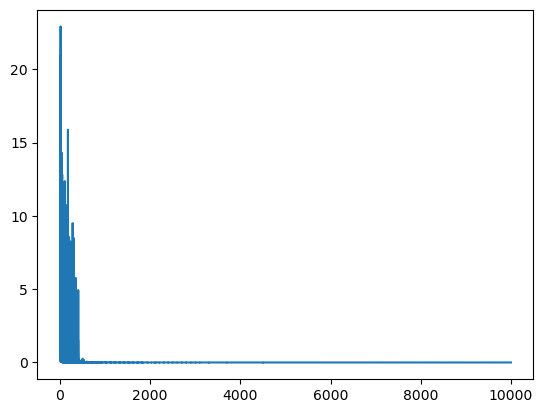

In [134]:
plt.plot(Loss)

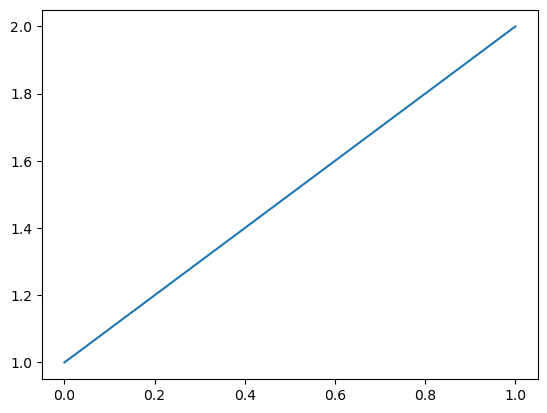

In [109]:
np.log(1)

0.0

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sigmoid_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=300, out_features=200, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=200, out_features=10, bias=True)
    (5): LogSoftmax(dim=None)
  )
)
Epoch 1
-------------------------------
loss: 2.373427  [   32/60000]
Epoch 2
-------------------------------


C:\Users\Patron\anaconda3\lib\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


loss: 2.355883  [   32/60000]
Epoch 3
-------------------------------
loss: 2.340100  [   32/60000]
Epoch 4
-------------------------------
loss: 2.325925  [   32/60000]
Epoch 5
-------------------------------
loss: 2.313217  [   32/60000]
Epoch 6
-------------------------------
loss: 2.301843  [   32/60000]
Epoch 7
-------------------------------
loss: 2.291684  [   32/60000]
Epoch 8
-------------------------------
loss: 2.282624  [   32/60000]
Epoch 9
-------------------------------
loss: 2.274558  [   32/60000]
Epoch 10
-------------------------------
loss: 2.267388  [   32/60000]
Epoch 11
-------------------------------
loss: 2.261023  [   32/60000]
Epoch 12
-------------------------------
loss: 2.255379  [   32/60000]
Epoch 13
-------------------------------
loss: 2.250381  [   32/60000]
Epoch 14
-------------------------------
loss: 2.245958  [   32/60000]
Epoch 15
-------------------------------
loss: 2.242047  [   32/60000]
Epoch 16
-------------------------------
loss: 2.23859

Epoch 16
-------------------------------
loss: 1.910409  [   32/60000]
loss: 1.955786  [ 3232/60000]
loss: 1.774282  [ 6432/60000]
loss: 1.858883  [ 9632/60000]
Epoch 17
-------------------------------
loss: 1.817415  [   32/60000]
loss: 1.868520  [ 3232/60000]
loss: 1.674127  [ 6432/60000]
loss: 1.759889  [ 9632/60000]
Epoch 18
-------------------------------
loss: 1.721114  [   32/60000]
loss: 1.772126  [ 3232/60000]
loss: 1.577025  [ 6432/60000]
loss: 1.656107  [ 9632/60000]
Epoch 19
-------------------------------
loss: 1.623549  [   32/60000]
loss: 1.668799  [ 3232/60000]
loss: 1.484659  [ 6432/60000]
loss: 1.551378  [ 9632/60000]
Epoch 20
-------------------------------
loss: 1.527582  [   32/60000]
loss: 1.564146  [ 3232/60000]
loss: 1.400067  [ 6432/60000]
loss: 1.451436  [ 9632/60000]
10000
10000
Test Error: 
 Accuracy: 54.8%, Avg loss: 1.426813 

Epoch 1
-------------------------------
loss: 1.437771  [   32/60000]
loss: 1.465341  [ 3232/60000]
loss: 1.326128  [ 6432/60000]
l

loss: 0.420244  [44832/60000]
loss: 0.253822  [48032/60000]
loss: 0.447034  [51232/60000]
loss: 0.233018  [54432/60000]
loss: 0.332531  [57632/60000]
Epoch 2
-------------------------------
loss: 0.432627  [   32/60000]
loss: 0.547201  [ 3232/60000]
loss: 0.451704  [ 6432/60000]
loss: 0.433784  [ 9632/60000]
loss: 0.324551  [12832/60000]
loss: 0.456623  [16032/60000]
loss: 0.222621  [19232/60000]
loss: 0.211265  [22432/60000]
loss: 0.314987  [25632/60000]
loss: 0.198867  [28832/60000]
loss: 0.385004  [32032/60000]
loss: 0.292424  [35232/60000]
loss: 0.255364  [38432/60000]
loss: 0.326562  [41632/60000]
loss: 0.413809  [44832/60000]
loss: 0.246241  [48032/60000]
loss: 0.433302  [51232/60000]
loss: 0.223721  [54432/60000]
loss: 0.320198  [57632/60000]
Epoch 3
-------------------------------
loss: 0.400110  [   32/60000]
loss: 0.520179  [ 3232/60000]
loss: 0.444532  [ 6432/60000]
loss: 0.425174  [ 9632/60000]
loss: 0.310423  [12832/60000]
loss: 0.442297  [16032/60000]
loss: 0.217485  [192

loss: 0.289331  [ 9632/60000]
loss: 0.210312  [12832/60000]
loss: 0.353385  [16032/60000]
loss: 0.207022  [19232/60000]
loss: 0.152885  [22432/60000]
loss: 0.228695  [25632/60000]
loss: 0.116541  [28832/60000]
loss: 0.354652  [32032/60000]
loss: 0.200889  [35232/60000]
loss: 0.219486  [38432/60000]
loss: 0.301422  [41632/60000]
loss: 0.376866  [44832/60000]
loss: 0.214451  [48032/60000]
loss: 0.339850  [51232/60000]
loss: 0.175057  [54432/60000]
loss: 0.258697  [57632/60000]
Epoch 16
-------------------------------
loss: 0.216857  [   32/60000]
loss: 0.361046  [ 3232/60000]
loss: 0.385132  [ 6432/60000]
loss: 0.278087  [ 9632/60000]
loss: 0.205775  [12832/60000]
loss: 0.348538  [16032/60000]
loss: 0.207380  [19232/60000]
loss: 0.149319  [22432/60000]
loss: 0.223843  [25632/60000]
loss: 0.113497  [28832/60000]
loss: 0.352570  [32032/60000]
loss: 0.197157  [35232/60000]
loss: 0.217827  [38432/60000]
loss: 0.298248  [41632/60000]
loss: 0.373640  [44832/60000]
loss: 0.212335  [48032/60000]

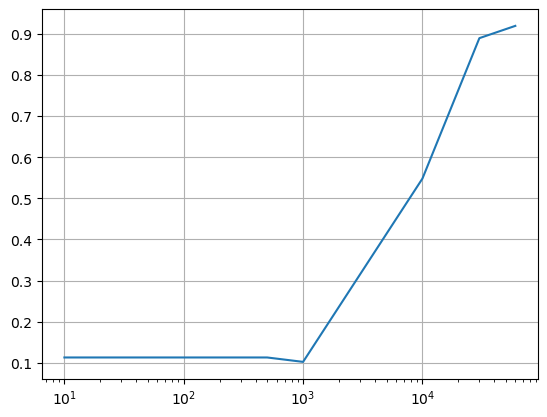

In [133]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import ToTensor
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math
from torch import nn

learning_rate = 0.01
batch_size = 32

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear(28*28, 300),
            nn.Sigmoid(),
            nn.Linear(300, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.LogSoftmax(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sigmoid_stack(x)
        #Y = nn.Softmax(dim=1)(logits)
        return logits

def train_loop(dataloader, model, loss_fn, optimizer, data_size):
    size = len(dataloader.dataset)
    #print(size)
    i = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        #print(pred)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            #print(batch)
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        i += batch_size
        if i >= data_size-1:
            break


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    print(size)
    num_batches = len(dataloader)
    print(num_batches)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

mnist_data_train = torchvision.datasets.MNIST('.', train=True,download=True, transform=ToTensor())
train_data_loader = torch.utils.data.DataLoader(mnist_data_train, batch_size=batch_size, shuffle=False)
mnist_data_test = torchvision.datasets.MNIST('.', train=False,download=True, transform=ToTensor())
test_data_loader = torch.utils.data.DataLoader(mnist_data_test, batch_size=1, shuffle=False)


#train_features, train_labels = next(iter(train_data_loader))
model = NeuralNetwork()
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#logits = model(train_features)
#pred_probab = nn.Softmax(dim=1)(logits)
#y_pred = pred_probab.argmax(1)
#print(f"Predicted class: {y_pred}")

mis_pred_list = []
dataset_l = [10, 100, 500, 1000, 10000, 30000, 60000]
epochs = 20
for dataset in dataset_l:
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_data_loader, model, loss_fn, optimizer, dataset)
    correct = test_loop(test_data_loader, model, loss_fn)
    mis_pred_list.append(correct)
print("Done!")

plt.plot(dataset_l, mis_pred_list)
plt.xscale("log")
plt.grid()
plt.savefig('pytorch_nn_learning_curve.pdf', format='pdf')